In [61]:
import network_conversion as ntc
import numpy as np
from matplotlib import pyplot as plt, colors
import seaborn as sns

In [2]:
ordering = ntc.Ordering.from_file("./concordant_networks/size_14.csv")

In [3]:
static_conv = ntc.StaticConverter.from_file("./concordant_networks/static_base_1_threshold_4.graphml", ordering)

/home/davidwu/REPOS/echidna_network/network_conversion.py:402: RuntimeWarning: divide by zero encountered in reciprocal
  link_rate = link_time**-1


In [29]:
OUT = static_conv.outwards_weighting_matrix.todense()

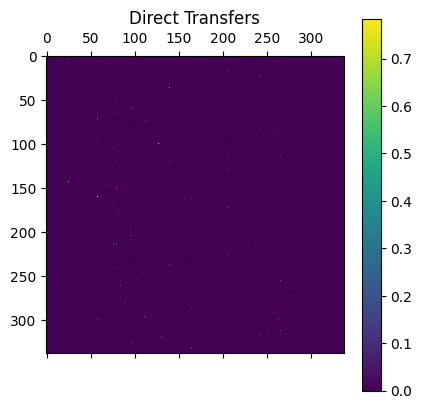

In [8]:
plt.matshow(OUT[:,:338])
plt.title('Direct Transfers')
plt.colorbar()

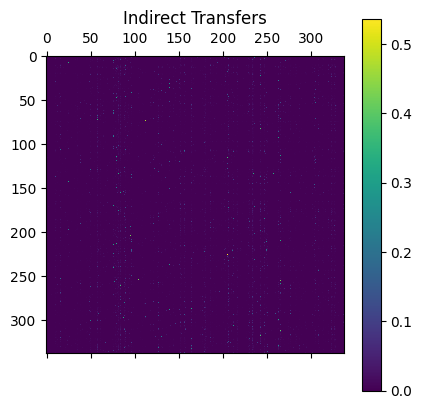

In [30]:
static_out_indirect = np.array(OUT[:,338:])

static_out_indirect -= static_out_indirect.diagonal() * np.eye(static_out_indirect.shape[0])

plt.matshow(static_out_indirect)
plt.title('Indirect Transfers')
plt.colorbar()

/tmp/ipykernel_978080/1614899096.py:1: RuntimeWarning: divide by zero encountered in reciprocal
  INTIME = static_conv.inwards_weighting_matrix ** -1
/home/davidwu/.virtualenvs/monv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'static network interadmission period (days)')

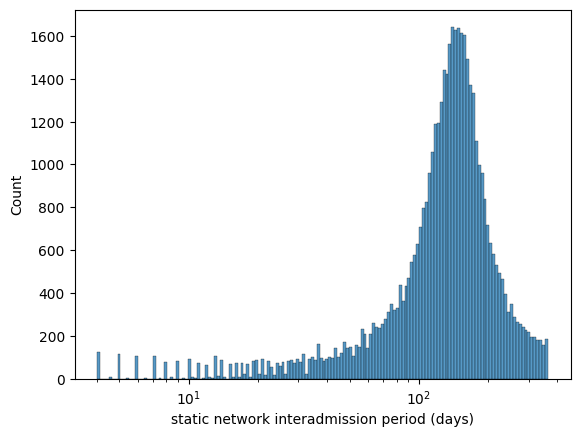

In [64]:
INTIME = static_conv.inwards_weighting_matrix ** -1
INTIME = INTIME[np.isfinite(INTIME)]
sns.histplot(INTIME, log_scale=(True, False))
plt.xlabel('static network interadmission period (days)')

/tmp/ipykernel_978080/2289641479.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  INTIME_RAW = static_conv.inwards_weighting_matrix ** -1


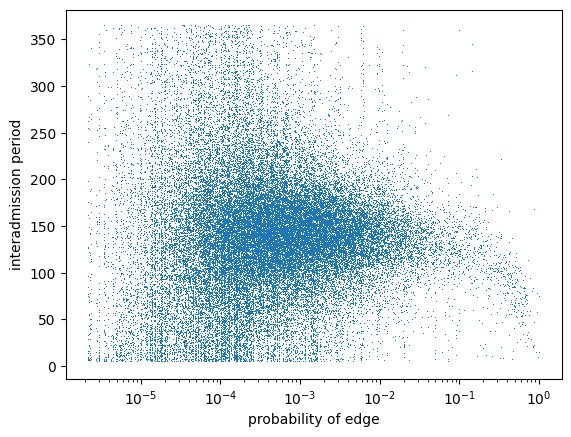

In [38]:
static_out_indirect_raw = OUT[:,338:]
INTIME_RAW = static_conv.inwards_weighting_matrix ** -1

plt.plot(static_out_indirect_raw.flatten(), INTIME_RAW.flatten(), ',')

plt.plot(static_out_indirect_raw.diagonal(), INTIME_RAW.diagonal(), 'rx')
plt.xlabel('probability of edge')
plt.ylabel('interadmission period')
# plt.xscale('log')

In [10]:
sconv = ntc.SnapshotWithHomeConverter.from_directory("./conc_tempo_14_detailed/", ordering=ordering)

/home/davidwu/REPOS/echidna_network/network_conversion.py:305: RuntimeWarning: invalid value encountered in divide
  direct_prop = direct / leaves
/home/davidwu/REPOS/echidna_network/network_conversion.py:306: RuntimeWarning: invalid value encountered in divide
  departs_prop = departs / leaves


Text(0.5, 1.0, 'snapshot')

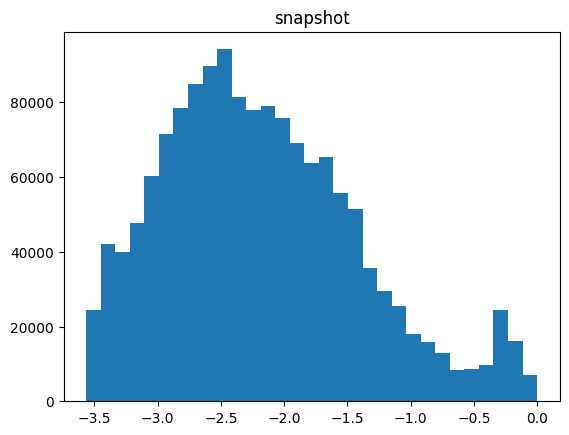

In [57]:
snapshot_probs = np.concatenate([mat.todense()[:,338:].flatten() for mat in sconv.outwards_weighting_matrices])
snapshot_probs = snapshot_probs[np.isfinite(snapshot_probs) & (snapshot_probs > 0.0)]
plt.hist(np.log10(snapshot_probs), bins=31);
plt.title('snapshot')

/home/davidwu/.virtualenvs/monv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'static')

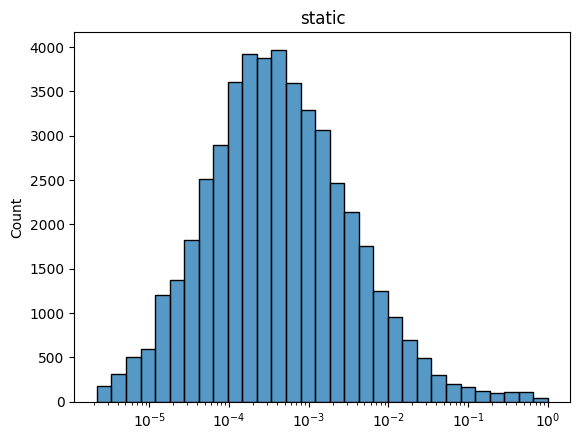

In [62]:
soir = static_out_indirect_raw.flatten()[np.isfinite(static_out_indirect_raw.flatten()) & (static_out_indirect_raw.flatten() > 0.0)]
sns.histplot(x=soir, log_scale=(True, False), bins=31);
plt.title('static')